# #Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.Draw the inferences from the clusters obtained.

In [16]:
# importing  clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [10]:
air=pd.read_excel("EastWestAirlines (1).xlsx",sheet_name="data")
air = data.drop(['ID#'], axis=1)

In [11]:
air.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [13]:
scaler = StandardScaler()
scaled_air = scaler.fit_transform (air[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']])

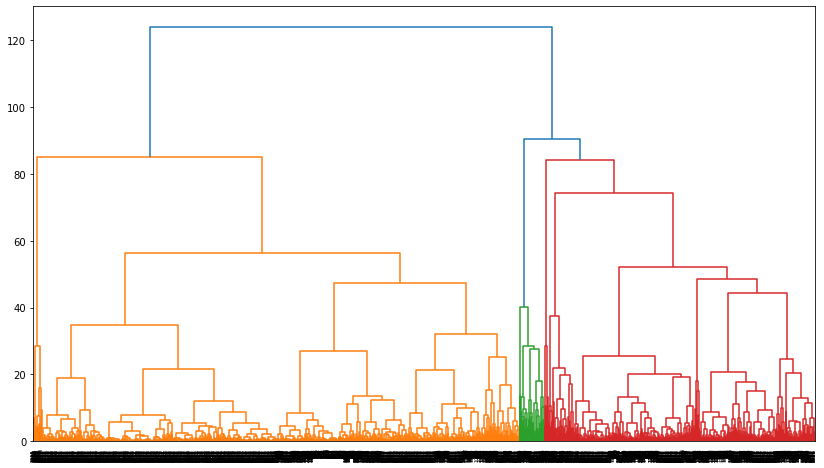

In [64]:
# create dendrogram
plt.figure(figsize=(14,8))
dendogram = sch.dendrogram(sch.linkage(scaled_air, method='ward'))

In [62]:
# Creating clusters and associating with the actual dataframe.
h_clusters = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'single')
h_clusters.fit(scaled_air)
air["H_Cluster_Id"]= h_clusters.labels_

In [17]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Cluster_Id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
air.groupby("H_Cluster_Id").mean()

Inference:
We can say that:

a) for cluster id 0 - the customers used frequent flyer credit card mostly to purchase flight tickets but have not travelled much.The miles balance earned is solely due to this.


b) for cluster 1 , flights tickets were purchased using frequent flyer credit cards, rewards points and business credit cards, so the miles earned are the most and they even were rewarded with free flights. The number of flown miles in 12 months are the most for this category.

c) for cluster 2 , flight tickets were purchased alot using reward points from credit cards. They have average flight miles and were not awarded free flights either.

# Using K Means

In [21]:
air_k = pd.read_excel("EastWestAirlines (1).xlsx",sheet_name="data")
air_k = air_k.drop(['ID#'], axis=1)
air_k.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
#normalizing function
scaler = StandardScaler()
scaled_air_k = scaler.fit_transform (air_k[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']])

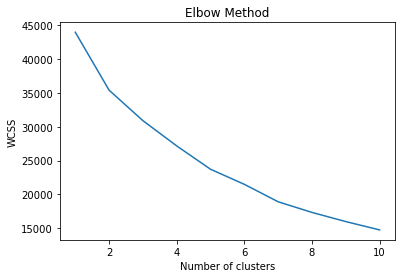

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


According to the Elbow daigram we can see that the optimum clusters for this dataset is 3 as the curve breaks from 3.

In [24]:
#Build Cluster algorithm
k = 3
clusters_k = KMeans(k)
clusters_k.fit(scaled_air_k)
air["K_Clusters"]=clusters_k.labels_

In [25]:
air.groupby('K_Clusters').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Cluster_Id
K_Clusters,,,,,,,,,,,,
0,117454.663759,157.509120,3.728787,1.002379,1.038065,40427.265662,18.982554,345.440127,1.022998,4886.176844,0.652657,0.000000
1,44370.062160,96.833333,1.235820,1.019037,1.000389,4831.835276,7.005439,200.697358,0.626263,3704.442502,0.203963,0.010101
2,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976,0.030488


# DBScan Clustering

In [27]:
air_d= pd.read_excel("EastWestAirlines (1).xlsx",sheet_name="data")
air_d = air_d.drop(['ID#'], axis=1)
air_d.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
#normalizing function
scaler = StandardScaler()
scaled_air_d = scaler.fit_transform (air_d[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']])

In [29]:
#fitting the dbscan model to get clusters
db_clusters = DBSCAN(eps=1.8, min_samples=12)
db_clusters.fit(scaled_air_d)
air["DB_Clusters"] = db_clusters.labels_

In [30]:
air.groupby("DB_Clusters").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Cluster_Id,K_Clusters
DB_Clusters,,,,,,,,,,,,,
-1,214778.833333,1433.935374,2.639456,1.146259,1.166667,44425.316327,24.377551,3041.717687,8.850340,4750.955782,0.741497,0.105442,1.074830
0,57056.639885,33.171405,1.691389,1.000000,1.000000,9715.827359,8.834363,180.905645,0.533993,3807.421920,0.000000,0.000000,0.836836
1,72946.885194,58.772763,2.644497,1.000000,1.000000,25167.546318,13.930325,400.269200,1.258116,4577.885194,1.000000,0.000000,0.427553
2,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000,0.000000,1.000000


In [31]:
# Final Dataframe with all three Clustering methods results together - 
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Cluster_Id,K_Clusters,DB_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0


# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [32]:
# importing  clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [35]:
crime_df = pd.read_csv("crime_data (1).csv")
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [39]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform (crime_df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# Heirarchical Clustering

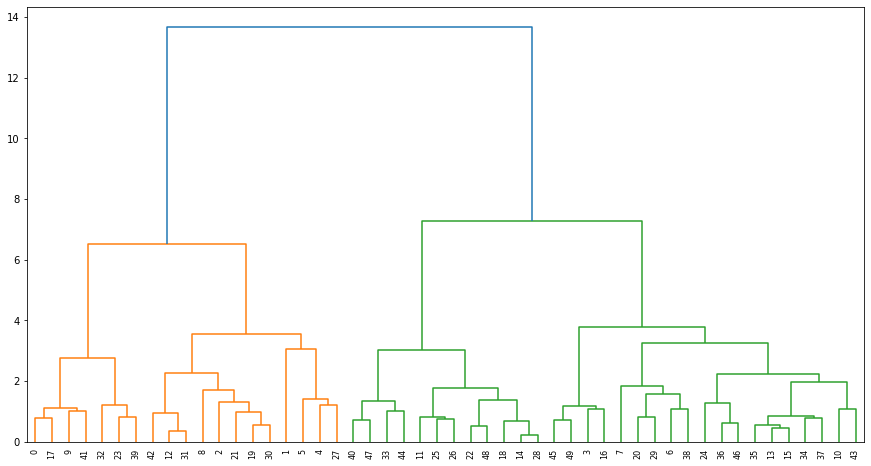

In [41]:
# create dendrogram
plt.figure(figsize=(15,8))
dendogram = sch.dendrogram(sch.linkage(scaled_crime_df, method='ward'))

In [42]:
# Creating clusters and associating with the actual dataframe.
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_crime_df)
crime_df["H_Cluster_Id"]= h_clusters.labels_

In [43]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [44]:
crime_df.groupby("H_Cluster_Id").mean()

,Murder,Assault,UrbanPop,Rape
H_Cluster_Id,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


Inference:

We can say that the states with cluster id 0 has maximum crime rate and states with cluster id 1 has medium crime rate and states with cluster id 2 have the least crime rate.

# Using K Means# 

In [45]:
crime_k= pd.read_csv("crime_data (1).csv")
crime_k.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
#normalizing function
scaler = StandardScaler()
scaled_crime_k = scaler.fit_transform (crime_k[['Murder', 'Assault', 'UrbanPop', 'Rape']])

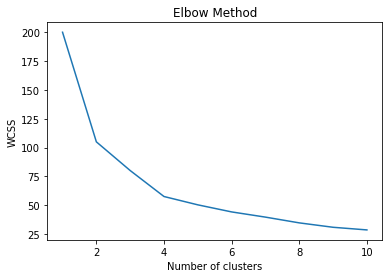

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


According to the Elbow daigram we can see that the optimum clusters for this dataset is 2 as the curve breaks from 2.

In [48]:
#Build Cluster algorithm
k = 2
clusters_k = KMeans(k)
clusters_k.fit(scaled_crime_k)
crime_df["K_Clusters"]=clusters_k.labels_

In [49]:
#filtering crime_k dataframe with clusters, high crime rate
crime_df[crime_df.K_Clusters==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
11,Idaho,2.6,120,54,14.2,2,0
13,Indiana,7.2,113,65,21.0,1,0
14,Iowa,2.2,56,57,11.3,2,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
18,Maine,2.1,83,51,7.8,2,0


In [50]:
#filtering crime_k dataframe with clusters, low crime rate
crime_df[crime_df.K_Clusters==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,1
12,Illinois,10.4,249,83,24.0,0,1
17,Louisiana,15.4,249,66,22.2,0,1
19,Maryland,11.3,300,67,27.8,0,1


For K Means clustering we have 2 clusters which was determined by the elbow daigram and the first cluster has high crime rate and the states in the second cluster, have low crime rate.

# DBScan Clustering

In [54]:
crime_db= pd.read_csv("crime_data (1).csv")

In [55]:
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [57]:
#normalizing function
scaler = StandardScaler()
scaled_crime_db = scaler.fit_transform (crime_db[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [58]:
#fitting the dbscan model to get clusters
db_clusters = DBSCAN(eps=1.2, min_samples=4)
db_clusters.fit(scaled_crime_db)
crime_df["DB_Clusters"] = db_clusters.labels_

In [59]:
crime_df.groupby("DB_Clusters").mean()

,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
DB_Clusters,,,,,,
-1,10.900000,266.000000,75.600000,40.340000,0.000000,1.000000
0,14.671429,251.285714,54.285714,21.685714,0.000000,1.000000
1,6.110526,143.394737,66.289474,18.634211,1.131579,0.210526


In [60]:
# Final Dataframe with all three Clustering methods results together - 
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters,DB_Clusters
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,0,1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,1,0,1
7,Delaware,5.9,238,72,15.8,1,0,1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,1,0
